<a href="https://colab.research.google.com/github/RishabhSrivastav/Hello-World/blob/master/Project_MALI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project MA|LI

## Predicting sales and marketing data for future strategies!

Resources used -
* Python Version: 3.7
* Packages: pandas, numpy, sklearn, matplotlib, seaborn, pandas profiling, lazypredict
* Base: Jupyter Notebook/Google Colab

## Issue: The challenge we have here is - Bookings! We are going to deep dive into data and find out insights which will help us to form future strategies.

Before diving to data itself, let's see what are the contents we are going to cover -

* Understanding the problem
* Hypothesis
* Getting data
* Data Pre-Processing/EDA(Exploratory Data Analysis)
* Feature Engineering
* Model Building
* Model Testing/Experiment/Prediction
* Front End for end user


## Understanding The Problem

Bookings have always been crucial for any business. Though we are considering the fact that B2B usage of the services are changing rapidly so you might see few factors which we are going to consider in our data. Let's move to Hypothesis for better understanding -

## Hypothesis

When you read about this challenge  -
What factors can you think of right now which can influence bookings and sales ?
We would like you to think about it and give us a feedback if you want us to consider it in our Hypothesis.

Defining a hypothesis has two parts: 
Null Hypothesis (Ho) and Alternate Hypothesis(Ha). 
They can be understood as:
* Ho - There exists no impact of a particular feature on the dependent variable. 
* Ha - There exists a direct impact of a particular feature on the dependent variable.

Based on a decision criterion (say, 5% significance level), we always 'reject' or 'fail to reject' the null hypothesis in statistical parlance. Practically, while model building we look for probability (p) values. If p value < 0.05, we reject the null hypothesis. If p > 0.05, we fail to reject the null hypothesis.


Some factors which we can think of that influence bookings are the following:
* OnNet Service Availability
* Pricing
* Time taken for Delivery
* Specific configuration 
* Previous Service Track Record/ Major Incidents/ Customer Service
* Market Trend for specific products



## COVID - 19: Crisis - Idea - Opportunity

When integrating forecasting model, it’s essential to understand that they are vulnerable to anomalies like the COVID-19 pandemic. It means that machine learning models should be upgraded according to a current reality.
As the these model processes historical data, it can’t know that the demand has radically changed.

In that case, there might be several ways to get an accurate forecast:

* Collect data about new market behavior: Once the situation becomes more or less stable, develop a model from scratch.

* Apply feature engineering approach: By processing external data like - news, a current market state, price index, and other economic factors, machine learning models are capable of making more up-to-date forecasts.

* Upload the most recent data: The period of a loadable dataset might vary from one to two months, depending on the product's category. In this way, we can timely detect shifts in demand patterns and enhance forecast accuracy.

* Apply natural language processing (NLP) approach: NLP technology enables the processing of real comments from social networks, online platforms, and other available sources for example - customer usage of Colt Online. By utilizing text mining and sentiment analysis approaches, NLP models gather samples of customer’s behaviour. This method allows the detection of preferences, choices, intrested product research and behavior shifts.


Let us know if you think more factors can be added here..

### Our vision is to have integrated information hub based on profile of customer, future investment forcasting, geo expansions, right product category, offers that can be provided, OnNet availability, customer service track record and much more. 
A single dashboard with all the information that can be utilized by sales and marketing team. We have to have our data ready beforehand so that we can save customers time for research.

## Prototype -

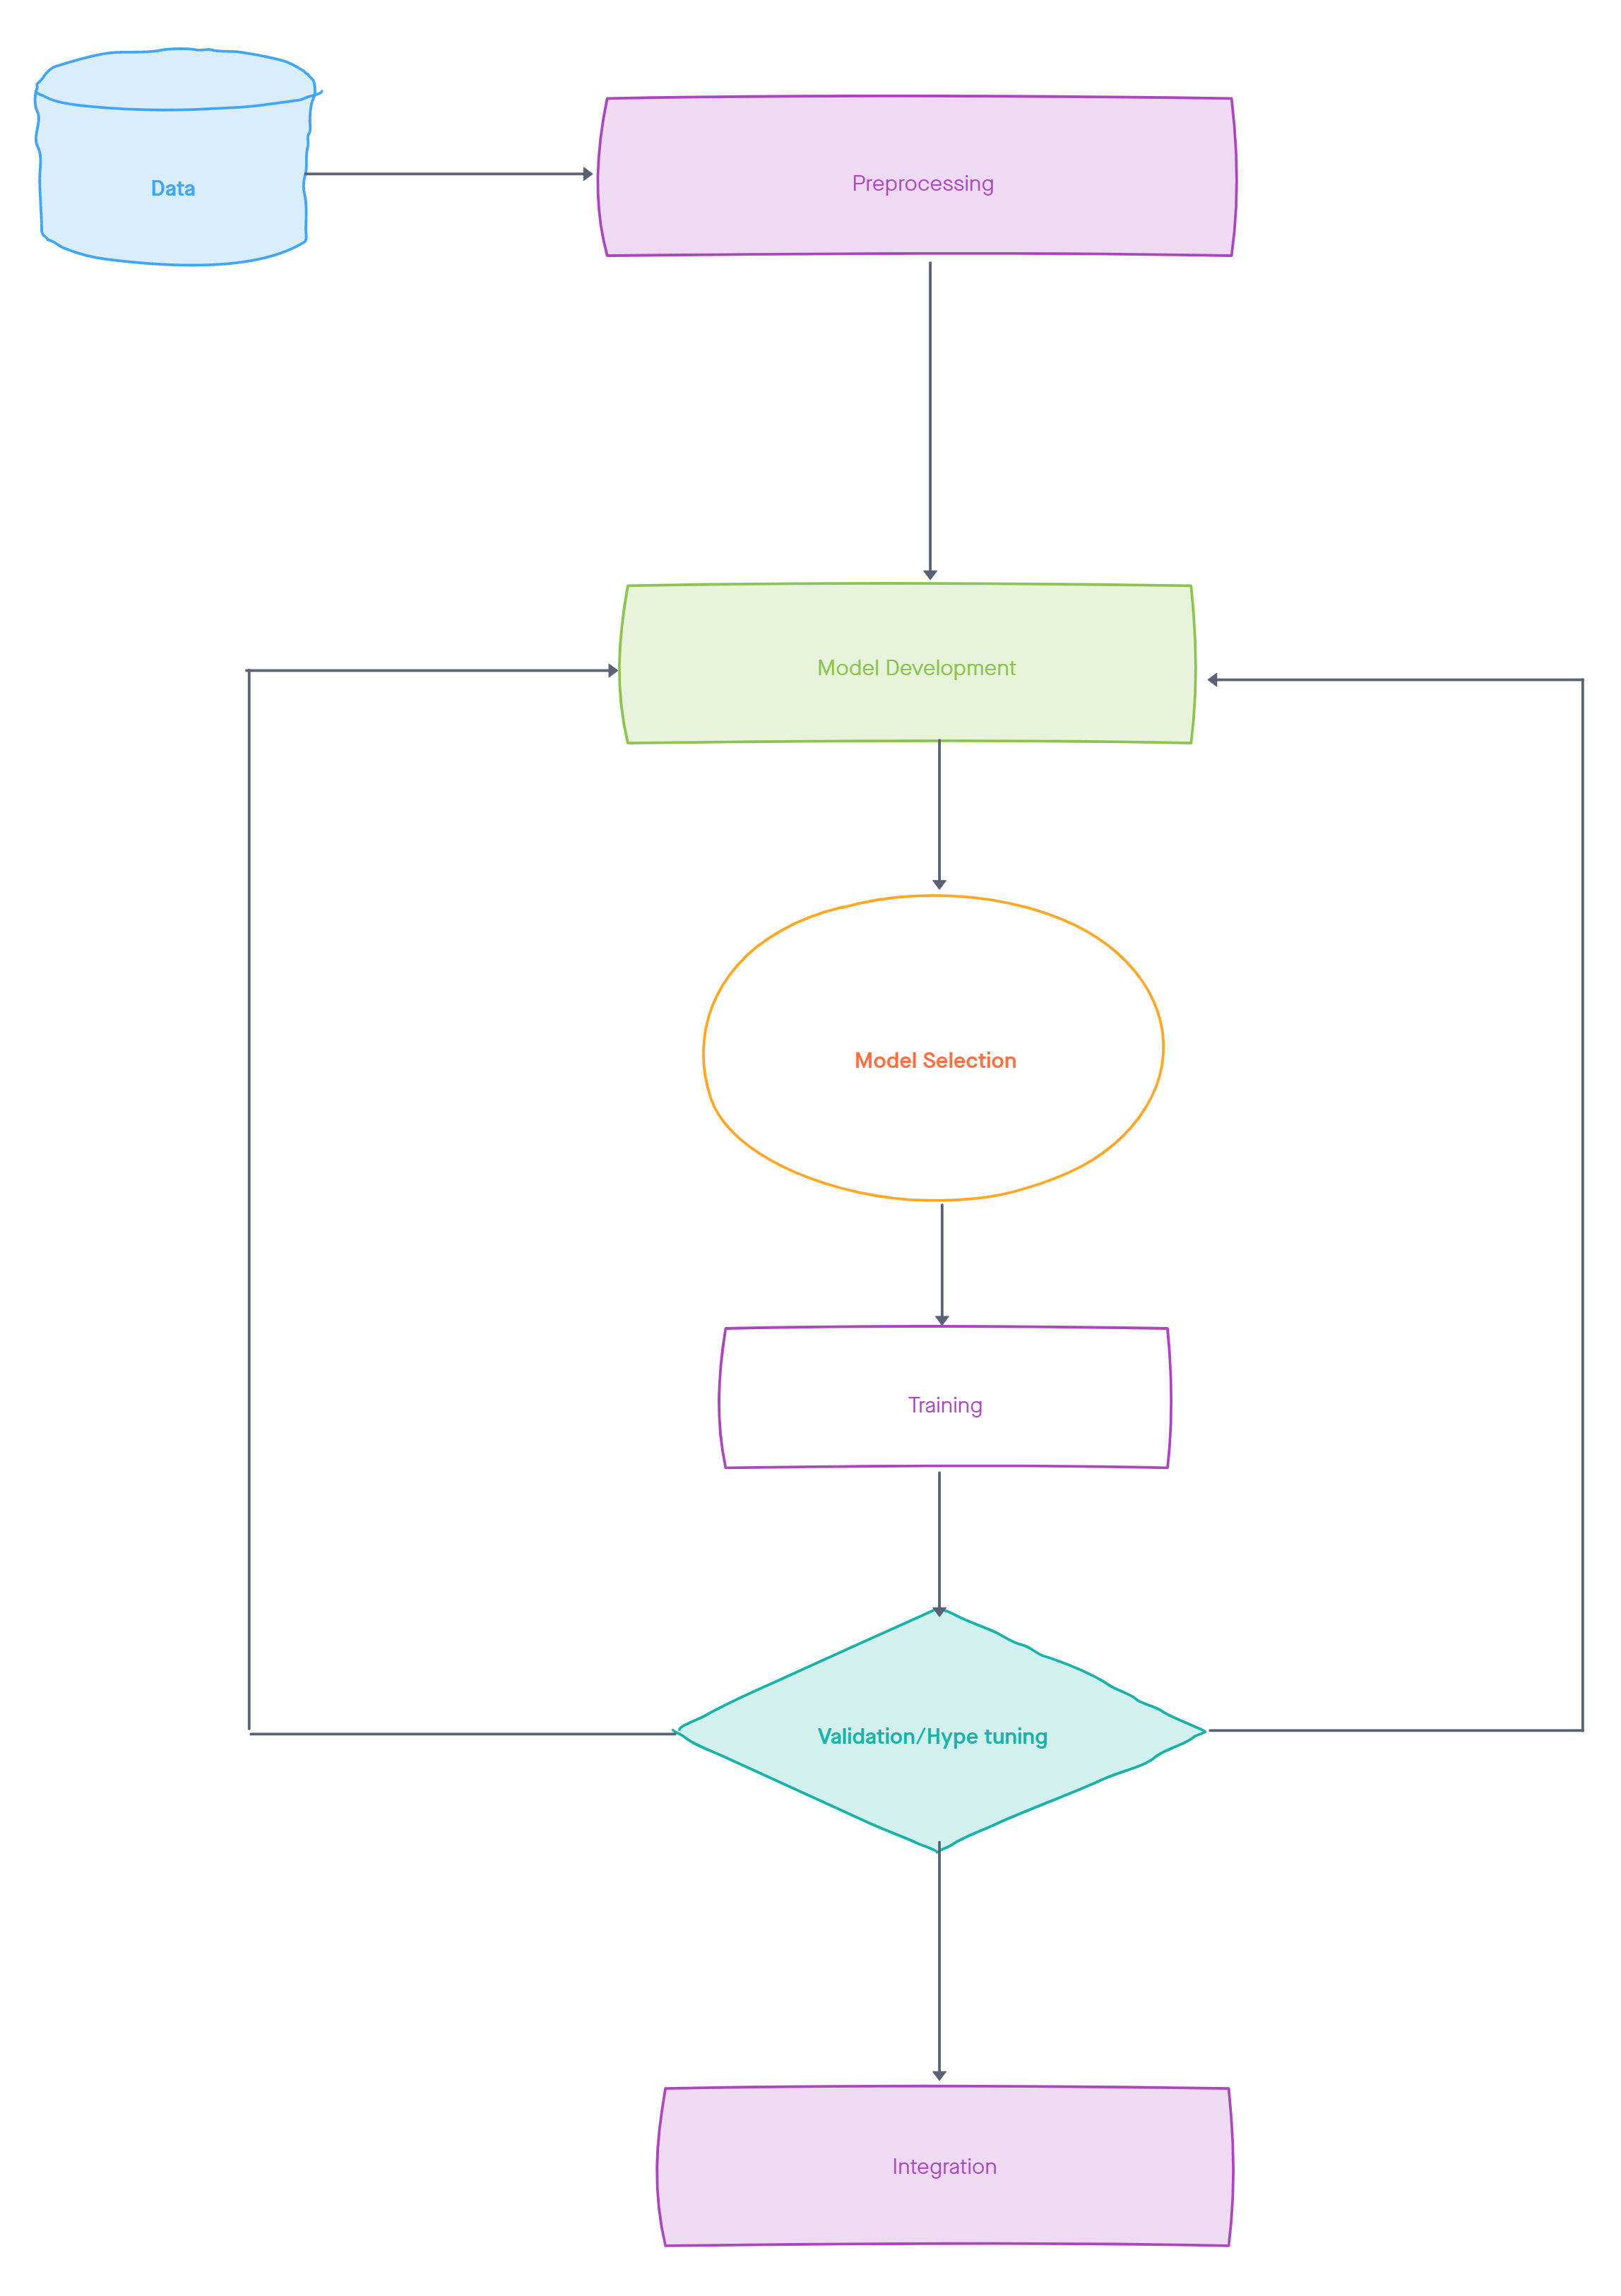

## Getting Data

Data is availble in excel format, Here are few Stats -
* Number of Columns - 18
* Number of Rows - 121900
* Missing Cell - 0
* Number of Rows for Voice Products - 27826
* Number of Rows for Data Products - 94074
* Duplicate Rows - 0

This is great since we don't have to invest more time in cleansing!

## Data Pre-Processing/EDA(Exploratory Data Analysis)

Let's quickly jump into coding and using pandas profiling let's do basic EDA -

In [ ]:
#importing basic packages
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
#path for the file
path = (r'C:\Users\risha\projects\Hackathon\Anonymised data.xlsx')

In [ ]:
#Creating pandas dataframe
df = pd.read_excel(path, engine='openpyxl')

In [ ]:
#Checking first 5 rows
df.head()

,Opp Number,Year,OCN,Colt Org Country,Parent OCN,Parent Acct Name,Account Name,Product Family,Product category,Product Name,Country,Close Month,Partner Name,Sales Tier,V_Opp_WON_Filter,Contract Term (Months),ARR+AU€,ACV€
63656,523368,2020,1528,FR,5004,Parent Company 14353,Child Company 18445,DATA,COLT IP VPN SERVICES,COLT IP VPN PLUS,FR,SEP,Partner 1,TIER 1,WON,0,4690.0,6035.0
94384,610439,2017,1418,AT,4873,Parent Company 1424,Child Company 1890,DATA,ETHERNET SERVICES,COLT ETHERNET HUB AND SPOKE,AT,DEC,Partner 1,WHOLESALE,WON,12,1248.0,1448.0
9464,649574,2017,2218,AT,12164,Parent Company 6074,Child Company 8046,DATA,ETHERNET SERVICES,COLT PRIVATE ETHERNET,DE,APR,Partner 39,TIER 1,WON,36,30000.0,30000.0
110659,99039,2018,5006,ES,3089,Parent Company 12670,Child Company 16347,VOICE,CLOUD UC,COLT CLOUD UC,PT,JUL,Partner 63,TIER 5,WON,12,0.0,226.0
99995,820031,2017,1136,FR,3501,Parent Company 13039,Child Company 16781,DATA,ETHERNET SERVICES,COLT ETHERNET HUB AND SPOKE,FR,APR,Partner 1,WHOLESALE,WON,24,420.0,620.0


In [ ]:
#Columns
df.columns

Index(['Opp Number', 'Year', 'OCN', 'Colt Org Country', 'Parent OCN',
       'Parent Acct Name', 'Account Name', 'Product Family',
       'Product category', 'Product Name', 'Country', 'Close Month',
       'Partner Name', 'Sales Tier', 'V_Opp_WON_Filter',
       'Contract Term (Months)', 'ARR+AU€', 'ACV€'],
      dtype='object')

In [ ]:
#pandas-profililing for basic EDA and getting around data
profile = ProfileReport(df, title='Profiling Report', html={'style':{'full_width': True}})

In [ ]:
#profile.to_notebook_iframe()

In [ ]:
#profile.to_file("EDA.html")

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Load dataset
data = df
X = df[['Opp Number', 'Year', 'OCN', 'Colt Org Country', 'Parent OCN',
       'Parent Acct Name', 'Account Name', 'Product Family',
       'Product category', 'Product Name', 'Country', 'Close Month',
       'Partner Name', 'Sales Tier', 'V_Opp_WON_Filter',
       'Contract Term (Months)']]
y = df['ACV€']

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =24)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

C:\Users\risha\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<?, ?it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
